# Client segmentation  | Cristiane Carneiro

Data exploration and transformation 

## Import libraries

In [55]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
import pylab as plt
import seaborn as sns

## Import dataset

In [56]:
data = pd.read_csv('../data/database.csv')

## Exploration and transformation 

In [57]:
#we got a synthetic database with demographic data (e.g., residence,generation,gender) and shopping info (e.g., categories,colours,season of purchase)
data.head(3)

,client_id,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,gender_female,gender_male,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter
0,76154,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,4,0,1,2,0,2,4,1,0,0
1,124710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,3,1,0,2,4,2,6,1,0,3,0,2,0,10
2,292032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1,0,0,0,6,3,1,5,2,1,3,0,2,10,0


In [58]:
#we create a copy since we will transform the database
data_original=data.copy()

In [59]:
#there is info on 12887 clients 
dim_original = data.shape
dim_original

(12887, 39)

In [60]:
#these are the columns. Since we got a couple of category variables, a lot of the columns represent dummies
data.columns

Index(['client_id', 'residence_country 1', 'residence_country 2',
       'residence_country 3', 'residence_country 4', 'residence_country 5',
       'residence_country 6', 'residence_country 7',
       'residence_other region 1', 'residence_other region 2',
       'residence_other region 3', 'residence_other region 4',
       'residence_other region 5', 'residence_other region 6',
       'residence_other region 7', 'residence_other region 8', 'gender_female',
       'gender_male', 'generation_gen silent/boomers', 'generation_gen x',
       'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter'],
      d

In [61]:
#there are no null values
#all variables are type int64 as they have been created as dummies or quantity variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12887 entries, 0 to 12886
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   client_id                      12887 non-null  int64
 1   residence_country 1            12887 non-null  int64
 2   residence_country 2            12887 non-null  int64
 3   residence_country 3            12887 non-null  int64
 4   residence_country 4            12887 non-null  int64
 5   residence_country 5            12887 non-null  int64
 6   residence_country 6            12887 non-null  int64
 7   residence_country 7            12887 non-null  int64
 8   residence_other region 1       12887 non-null  int64
 9   residence_other region 2       12887 non-null  int64
 10  residence_other region 3       12887 non-null  int64
 11  residence_other region 4       12887 non-null  int64
 12  residence_other region 5       12887 non-null  int64
 13  residence_other 

In [62]:
#as stated above, no null values 
nan_columns = data.isnull().sum()
nan_columns[nan_columns>1]

Series([], dtype: int64)

In [63]:
#there are no duplicated values 
data.duplicated().any()

False

In [64]:
#let us look into outliers; I will focus a new variable named total_sum (total products purchased across all seasons)
data.columns

Index(['client_id', 'residence_country 1', 'residence_country 2',
       'residence_country 3', 'residence_country 4', 'residence_country 5',
       'residence_country 6', 'residence_country 7',
       'residence_other region 1', 'residence_other region 2',
       'residence_other region 3', 'residence_other region 4',
       'residence_other region 5', 'residence_other region 6',
       'residence_other region 7', 'residence_other region 8', 'gender_female',
       'gender_male', 'generation_gen silent/boomers', 'generation_gen x',
       'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter'],
      d

In [65]:
season_columns = ['season_autumn', 'season_spring', 'season_summer',
       'season_winter'
]

In [66]:
data['total_sum'] = data[season_columns].sum(axis=1)

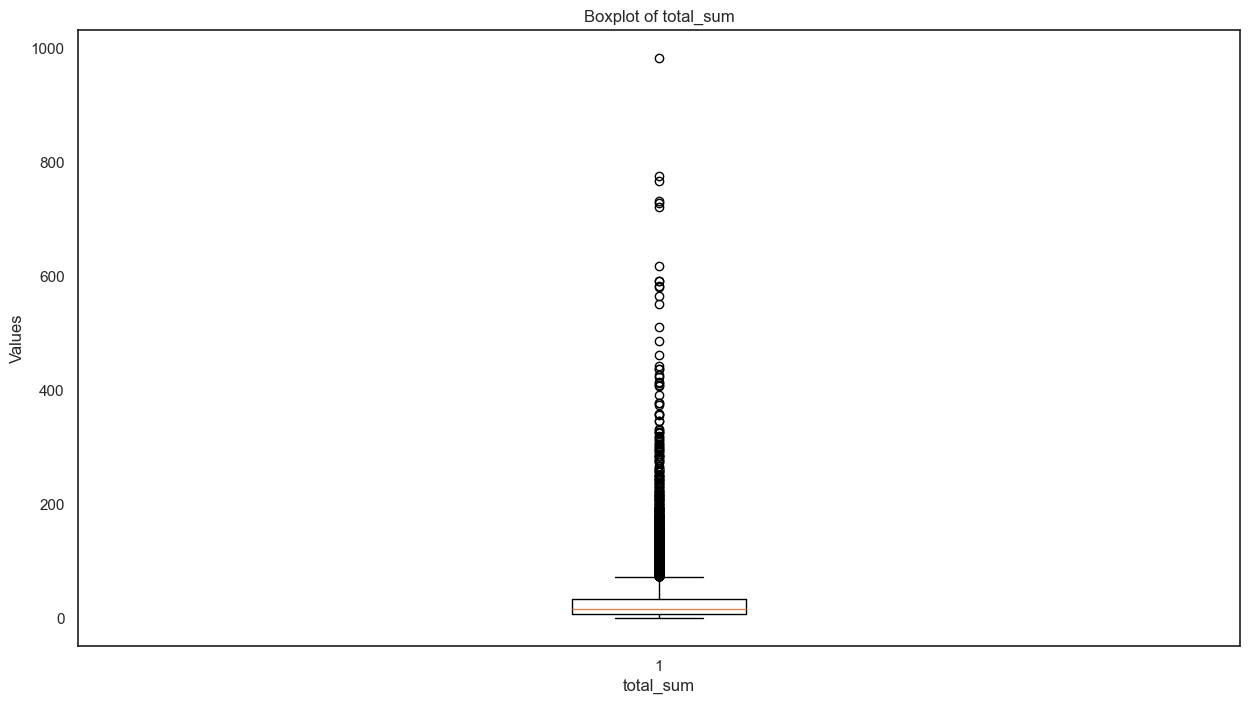

In [67]:
#checking for outliers 
plt.figure(figsize=(15, 8))
plt.boxplot(data['total_sum'].dropna())  # Ensure dropping NaN values if any
plt.title('Boxplot of total_sum')
plt.xlabel('total_sum')
plt.ylabel('Values')
plt.show();

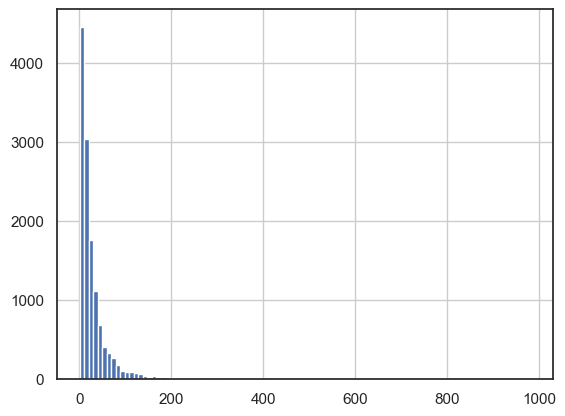

In [68]:
data.total_sum.hist(bins=100);

In [69]:
stats = data.describe().T
stats['IQR'] = stats['75%'] - stats['25%']

#test de turkey
stats['IQR1.5'] = 1.5 * stats['IQR'] + stats['75%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5
client_id,12887.0,4.993180e+08,2.871744e+08,76154.0,249199905.0,500192081.0,747102840.5,999917965.0,497902935.5,1.493957e+09
residence_country 1,12887.0,5.214557e-01,4.995588e-01,0.0,0.0,1.0,1.0,1.0,1.0,2.500000e+00
residence_country 2,12887.0,8.512454e-02,2.790778e-01,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
residence_country 3,12887.0,6.882905e-02,2.531730e-01,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
residence_country 4,12887.0,2.809032e-02,1.652373e-01,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
residence_country 5,12887.0,3.422053e-02,1.818022e-01,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
residence_country 6,12887.0,2.777993e-02,1.643481e-01,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
residence_country 7,12887.0,4.842089e-02,2.146623e-01,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
residence_other region 1,12887.0,2.506402e-02,1.563257e-01,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
residence_other region 2,12887.0,1.707147e-03,4.128395e-02,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00


In [70]:
thresholds_df = stats.drop(columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR'],axis=1)
thresholds_df.head()

,IQR1.5
client_id,1.493957e+09
residence_country 1,2.500000e+00
residence_country 2,0.000000e+00
residence_country 3,0.000000e+00
residence_country 4,0.000000e+00


In [71]:
upper_bound = thresholds_df.loc['total_sum','IQR1.5']
upper_bound

73.0

In [72]:
data = data[data['total_sum']<= upper_bound]
data.shape

(11892, 40)

In [73]:
#I will replace the absolute values for shopping data (e.g., categories, colors, seasons) for relative values to capture preference towards a given category, color or season regardless of the quantity purchased

In [74]:
category_columns = [
    'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes'
]

In [75]:
color_columns = ['color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth',
]

In [76]:
season_columns = ['season_autumn', 'season_spring', 'season_summer',
       'season_winter'
]

In [77]:
#for col in category_columns:
    #data[f'{col}_prop'] = data[col] / data['total_sum']

In [78]:
#for col in color_columns:
    #data[f'{col}_prop'] = data[col] / data['total_sum']

In [79]:
#for col in season_columns:
    #data[f'{col}_prop'] = data[col] / data['total_sum']

In [80]:
#columns_to_drop = category_columns + color_columns + season_columns + ['total_sum']

In [81]:
#data.drop(columns=columns_to_drop,axis=1,inplace=True)

In [82]:
data.head()

,client_id,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,gender_female,gender_male,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,76154,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,4,0,1,2,0,2,4,1,0,0,5
1,124710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,3,1,0,2,4,2,6,1,0,3,0,2,0,10,12
2,292032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1,0,0,0,6,3,1,5,2,1,3,0,2,10,0,12
3,382440,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,2,0,0,1,0,0,3,1,1,0,0,0,4,1,5
4,513675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,12,2,1,1,33,2,8,18,3,5,17,6,7,8,30,51


In [83]:
#checking for constant columns

cte_cols = []

for c in data.select_dtypes(include=np.number):   
    
    if len(data[c].unique()) == 1:
        
        cte_cols.append(c)
        
cte_cols 

[]

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,11892.0,4.986909e+08,2.872551e+08,76154.0,2.488295e+08,498877921.5,7.473818e+08,999917965.0
residence_country 1,11892.0,5.380087e-01,4.985742e-01,0.0,0.000000e+00,1.0,1.000000e+00,1.0
residence_country 2,11892.0,8.341742e-02,2.765238e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
residence_country 3,11892.0,6.676757e-02,2.496295e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
residence_country 4,11892.0,2.800202e-02,1.649854e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
residence_country 5,11892.0,3.119744e-02,1.738583e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
residence_country 6,11892.0,2.564749e-02,1.580880e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
residence_country 7,11892.0,4.994955e-02,2.178499e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
residence_other region 1,11892.0,2.514295e-02,1.565658e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.0
residence_other region 2,11892.0,1.429532e-03,3.778371e-02,0.0,0.000000e+00,0.0,0.000000e+00,1.0


In [85]:
subset = data.iloc[:,22:]
corr = subset.corr()
corr

,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
category_children clothes,1.000000,-0.071425,-0.038107,-0.047307,0.118083,-0.038859,-0.048463,-0.063316,0.291340,-0.002510,0.166050,0.286988,0.247596,0.166287,0.143573,0.120520,0.133975,0.200634
category_handbags,-0.071425,1.000000,-0.045269,0.102494,0.428876,0.047839,0.023155,0.307951,0.124536,0.369809,0.431740,0.136056,0.198424,0.221474,0.267478,0.227245,0.266638,0.350412
category_men clothes,-0.038107,-0.045269,1.000000,0.399401,0.118068,0.229006,0.086784,0.061933,0.471310,0.416440,0.324514,0.211556,0.517849,0.345794,0.340876,0.385584,0.376593,0.515719
category_men shoes,-0.047307,0.102494,0.399401,1.000000,0.237628,0.171545,-0.085855,0.224023,0.215257,0.425054,0.414397,0.092173,0.273299,0.246104,0.283467,0.280944,0.322246,0.404010
category_other,0.118083,0.428876,0.118068,0.237628,1.000000,0.250493,0.071140,0.318732,0.392510,0.594895,0.658934,0.321171,0.445060,0.434931,0.443537,0.418970,0.498396,0.640098
category_soft,-0.038859,0.047839,0.229006,0.171545,0.250493,1.000000,0.233238,0.247749,0.267441,0.403749,0.386166,0.208773,0.431236,0.358176,0.299430,0.316422,0.323107,0.461273
category_women clothes,-0.048463,0.023155,0.086784,-0.085855,0.071140,0.233238,1.000000,0.308824,0.484510,0.512476,0.257902,0.460207,0.583629,0.407347,0.431702,0.419670,0.384479,0.584292
category_women shoes,-0.063316,0.307951,0.061933,0.224023,0.318732,0.247749,0.308824,1.000000,0.278295,0.569325,0.572132,0.257415,0.421574,0.389850,0.435063,0.392976,0.396972,0.574750
color_cool_jewel,0.291340,0.124536,0.471310,0.215257,0.392510,0.267441,0.484510,0.278295,1.000000,0.500724,0.468036,0.429201,0.614002,0.502700,0.523324,0.506378,0.517355,0.729585
color_neutral_pastel,-0.002510,0.369809,0.416440,0.425054,0.594895,0.403749,0.512476,0.569325,0.500724,1.000000,0.600170,0.387017,0.627732,0.615616,0.604395,0.594164,0.624663,0.868096


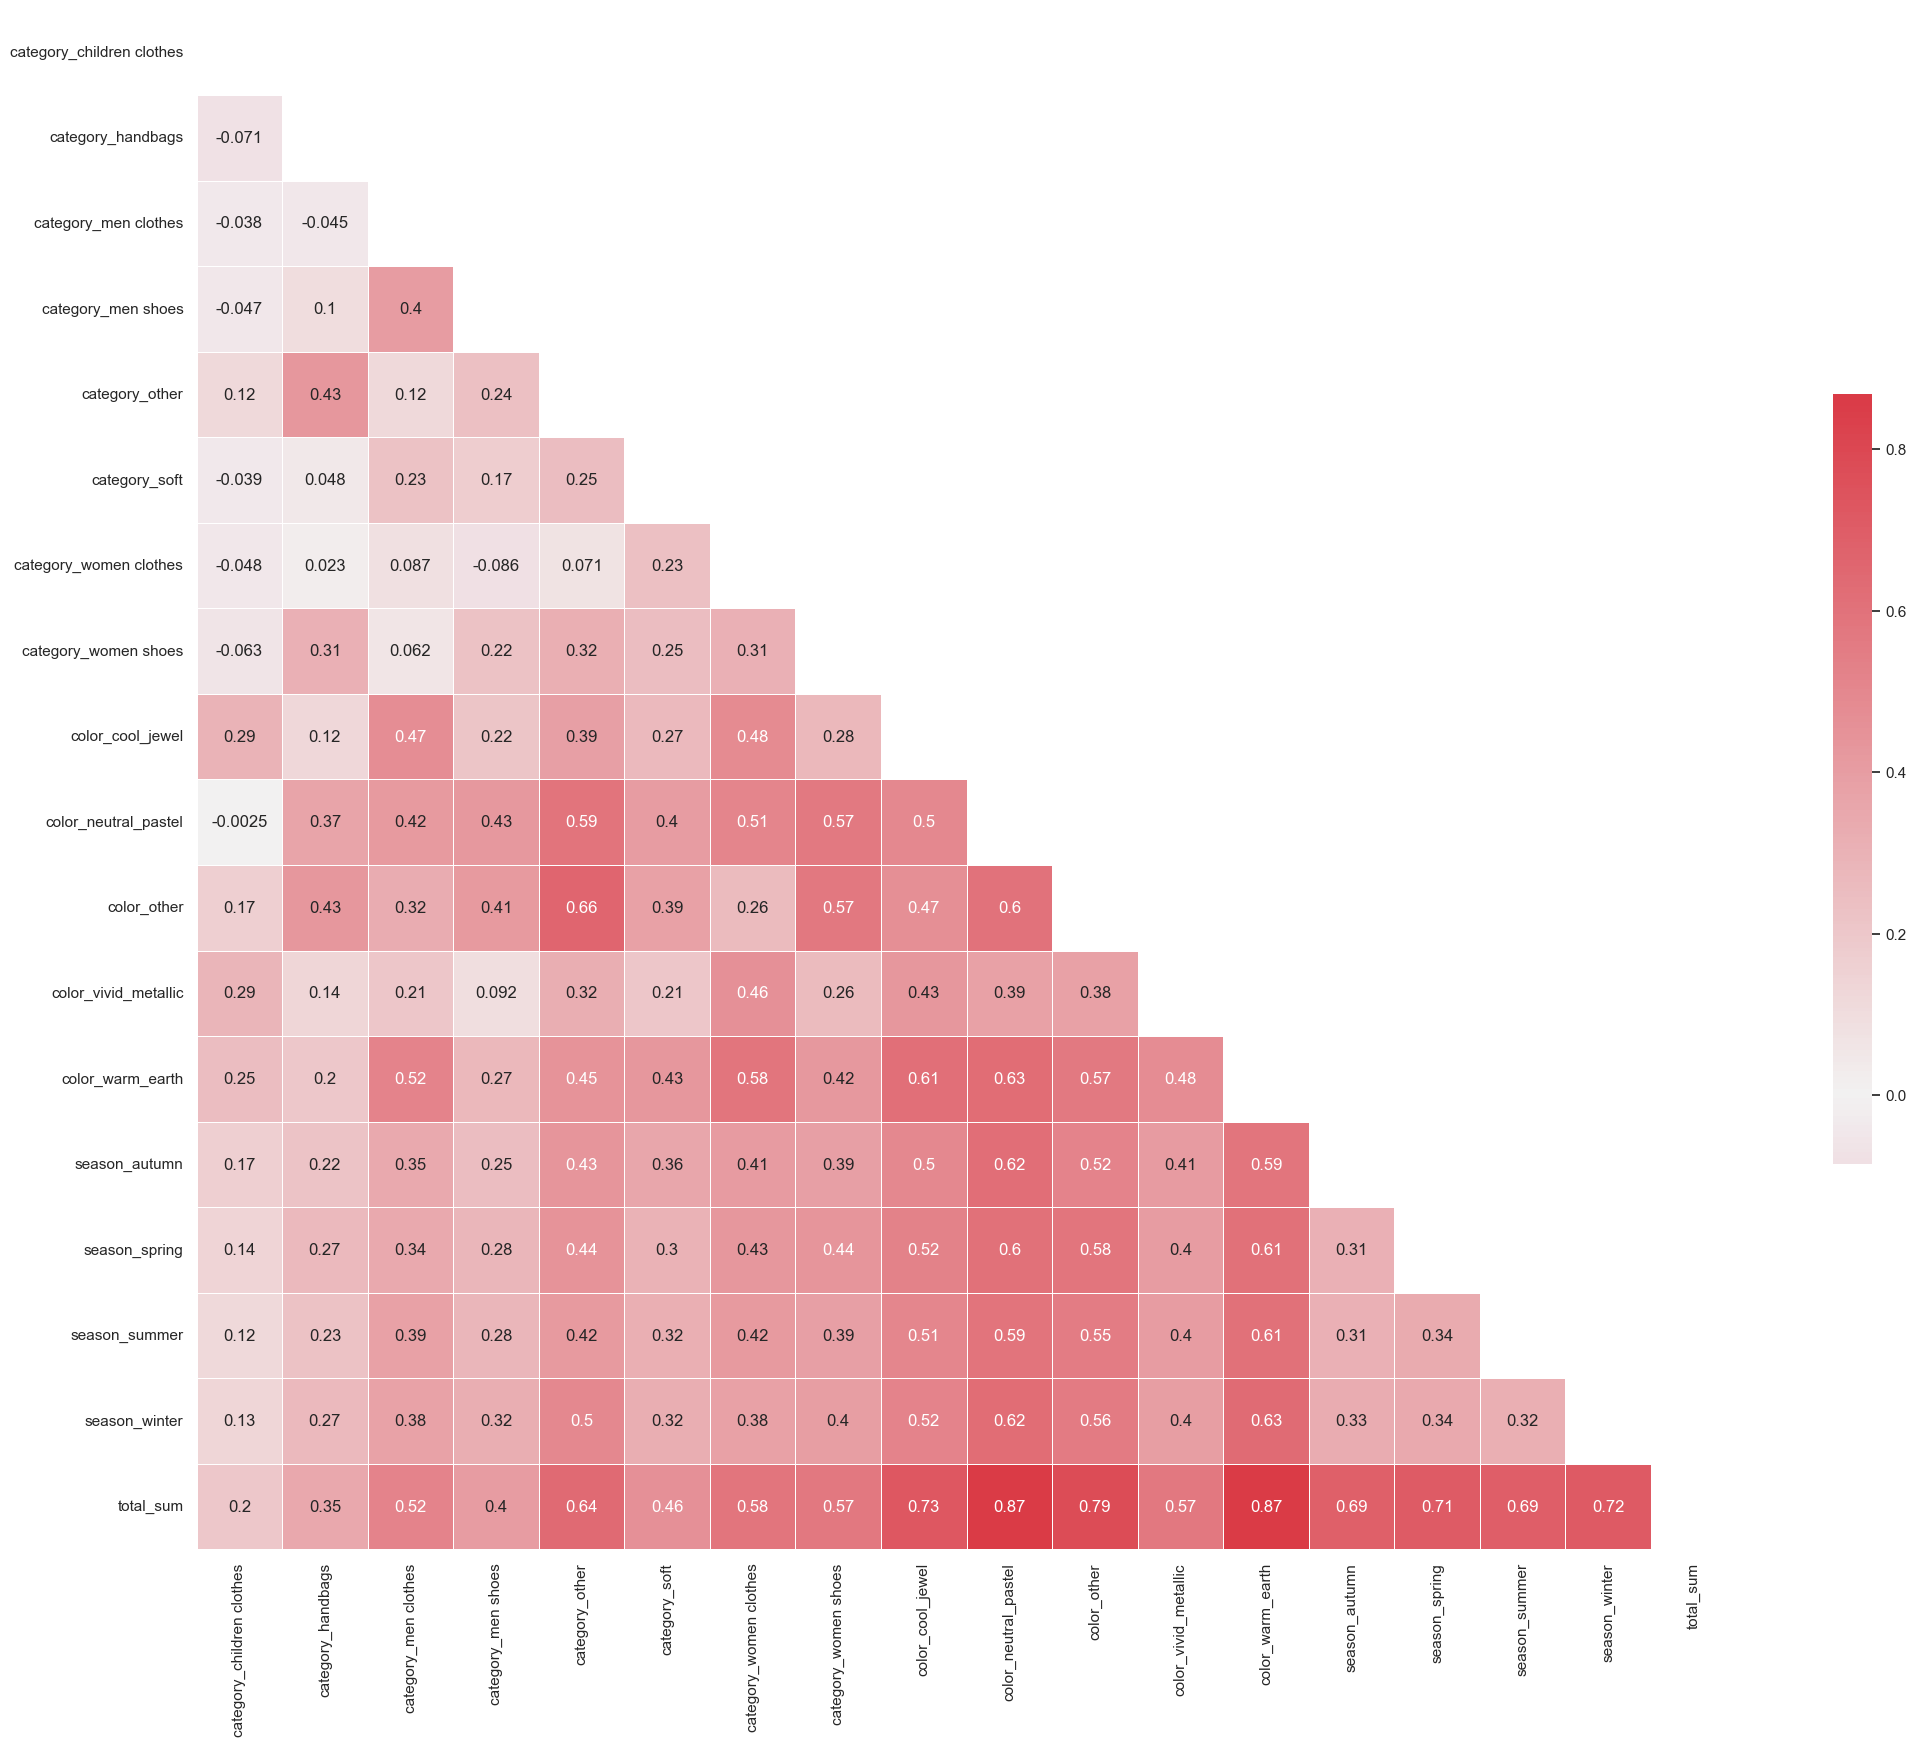

In [86]:
#checking for colinearity 
#will keep all variables as corr < 0.9

plt.figure(figsize=(25, 20))   

sns.set(style='white')   

mask=np.triu(np.ones_like(corr))   

cmap=sns.diverging_palette(0, 10, as_cmap=True)  


sns.heatmap(corr,    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [87]:
data_women = data[data['gender_female'] == 1]

In [88]:
data_women.drop(columns=['gender_male','gender_female'],axis=1,inplace=True)

/var/folders/5p/mpbfgq4n4c15mzcjt_1kz83c0000gn/T/ipykernel_5668/208156782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_women.drop(columns=['gender_male','gender_female'],axis=1,inplace=True)


In [89]:
data_men = data[data['gender_male'] == 1]

In [90]:
data_men.drop(columns=['gender_male','gender_female'],axis=1,inplace=True)

/var/folders/5p/mpbfgq4n4c15mzcjt_1kz83c0000gn/T/ipykernel_5668/1603169635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_men.drop(columns=['gender_male','gender_female'],axis=1,inplace=True)


## Final dataset 

In [91]:
data.to_csv('../data/data_clean_all.csv',index=False)

In [92]:
data_women.to_csv('../data/data_clean_women.csv',index=False)

In [93]:
data_men.to_csv('../data/data_clean_men.csv',index=False)